# Capstone Project Part I
### By Bailey Duncan

This Data Science Capstone project is an exploration of... **TODO**

The full report and problem summary can be found [here](./Capstone%20Report.md).

In [3]:
!pip install --upgrade pandas 
import pandas as pd
import numpy as np

# Machine Learning & Data Science Helper Library
import sklearn

# Map rendering library
import folium

Requirement already up-to-date: pandas in c:\users\baileyduncan\anaconda3\lib\site-packages (0.24.2)


In [4]:
apt_rentals = pd.read_csv("./Datasets/Toronto_apartment_rentals_2018.csv")

In [5]:
apt_rentals.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00"


## Lets take a look at our data with a map

In [6]:
def generate_map(dataframe, longitude, latitude):
        map = folium.Map(location=[latitude, longitude], zoom_start=11)

        # add markers to map
        for lat, lng, apt, price in zip(dataframe['Lat'], dataframe['Long'], dataframe['Address'], dataframe['Price']):
            label = '{}, {}'.format(price, apt)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='blue',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map)  
            
        return map

In [7]:
latitude = 43.72
longitude = -79.347

# create map of New York using latitude and longitude values
map_neighborhoods = generate_map(apt_rentals, longitude, latitude)
map_neighborhoods

The data looks good. We have a nice spread of data in the Toronto Area, as well as the surrounding cities.

We can see there are some outliers though as we have a few properies in Calgary, Montreal, and somewhere in Saskatchewan. We will remove those to better focus on Ontario.

## Extract the Price as a number (instead of a string)

In [8]:
# Remove '$' Character
apt_rentals['Price'] = apt_rentals['Price'].str.replace('$', '')

# Remove Comma's
apt_rentals['Price'] = apt_rentals['Price'].str.replace(',', '')

# Convert to Number
apt_rentals['Price'] = pd.to_numeric(apt_rentals['Price'])
apt_rentals.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0


In [9]:
# Remove the rent outliers from our prices
apt_rentals = apt_rentals[apt_rentals['Price'] < 6000]

## Remove Datapoints Outside of Ontario

In [10]:
# Get Calgary, Montréal, and the postal code for the SK datapoint
out_of_province = apt_rentals[apt_rentals['Address'].str.contains('Calgary|Montréal|M4Y0C4|M5B0A5')]
out_of_province.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
270,3,2.0,0,"M5B0A5, Canada",56.130366,-106.346771,4000.0
401,3,2.0,0,"M5B0A5, Canada",56.130366,-106.346771,4000.0
942,2,1.0,0,"1280 Rue Saint-Marc, Montréal, QC H3H 2G1, Canada",45.492511,-73.580293,1475.0
985,1,1.5,0,"3600 Av du Parc, Montréal, QC H2X 2J1, Canada",45.510566,-73.576385,1953.0
1023,1,1.0,1,"M4Y0C4, Canada",56.130366,-106.346771,1830.0


In [11]:
# Drop them
apt_rentals.drop(out_of_province.index.values, axis=0, inplace=True)

# Fix the indices
apt_rentals.reset_index(drop=True)
apt_rentals.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0


## Extract the Postal Code from each address

In [12]:
# Remove Numbers prefixed or postfixed by a space
apt_rentals['Address'] = apt_rentals['Address'].str.replace('\d+\s', '')
apt_rentals['Address'] = apt_rentals['Address'].str.replace('\s\d+', '')
apt_rentals['Address'].head()

0    Grand Park Drive, Grand Park Dr, Mississauga, ...
1                Front St W, Toronto, ON M5VR5, Canada
2                    McGill Street, Toronto, ON, M5BB1
3                      York Street, Toronto, ON, M5JE1
4             St Patrick St, Toronto, ON M5TX6, Canada
Name: Address, dtype: object

In [13]:
# Remove Words that have no numbers (Postal Codes are in the format A1A 1A1)
apt_rentals['Address'] = apt_rentals['Address'].str.replace(r'\b[^\d\W]+\b', '')

# Remove Any Extraneous Characters (#!$ spaces, newlines... etc)
apt_rentals['Address'] = apt_rentals['Address'].str.replace('[^a-zA-Z0-9]', '')

# Focus on the first three characters of the address
apt_rentals['Address'] = apt_rentals['Address'].str[:3]

apt_rentals.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,L5B,43.581639,-79.648193,2450.0
1,1,1.0,1,M5V,43.643051,-79.391643,2150.0
2,1,1.0,0,M5B,43.660605,-79.378635,1950.0
3,2,2.0,0,M5J,43.641087,-79.381405,2900.0
4,1,1.0,0,M5T,43.652487,-79.389622,1800.0


## Label the Neighborhood Names Using List of Toronto Postal Codes

In [14]:
# Note this removes all the data points outside of Toronto
neighborhoods = pd.read_csv('toronto_merged.csv')
neighborhoods = neighborhoods[['Postal Code', 'Neighborhood', 'Borough']]
neighborhoods.head()

,Postal Code,Neighborhood,Borough
0,M4E,The Beaches,East Toronto
1,M4K,"The Danforth West,Riverdale",East Toronto
2,M4L,"The Beaches West,India Bazaar",East Toronto
3,M4M,Studio District,East Toronto
4,M4N,Lawrence Park,Central Toronto


In [15]:
merge = pd.merge(apt_rentals, neighborhoods, left_on='Address', right_on='Postal Code')
merge.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,Postal Code,Neighborhood,Borough
0,1,1.0,1,M5V,43.643051,-79.391643,2150.0,M5V,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Downtown Toronto
1,1,1.0,0,M5V,43.640918,-79.393982,1900.0,M5V,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Downtown Toronto
2,1,1.0,0,M5V,43.641308,-79.400093,1900.0,M5V,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Downtown Toronto
3,1,1.0,1,M5V,43.640068,-79.399960,2400.0,M5V,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Downtown Toronto
4,1,1.0,0,M5V,43.647627,-79.390408,2650.0,M5V,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Downtown Toronto


## Data Exploration

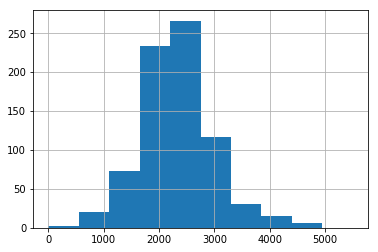

In [17]:
# Price Histogram
merge['Price'].hist(range=(0, 5500))

### Our distribution is quite nice, and is in the shape of a bell curve, although a little right heavy.

# Guiding Question: What effect do nearby businesses have on the apartment price?

## Grab Venues Close by the Apartments

In [253]:
# @hidden_cell
import requests
# FOURSQUARE API CREDENTIALS
CLIENT_ID = '5N1I2ZBKG55NFLJQELOZI3XTLBUXXCF3FKTJQSZ2WXPZBWR5' # your Foursquare ID
CLIENT_SECRET = 'P5MPRQBUI4MRPYUYQHFHDT0CWEF3D3U1WTKBGKGTK0VXAIBU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [249]:
apt_latitude = merge.loc[0, 'Lat'] # neighborhood latitude value
apt_longitude = merge.loc[0, 'Long'] # neighborhood longitude value

neighborhood_name = merge.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               apt_latitude, 
                                                               apt_longitude))

Latitude and longitude values of CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara are 43.6430505, -79.3916429.


In [265]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    apt_latitude, 
    apt_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=5N1I2ZBKG55NFLJQELOZI3XTLBUXXCF3FKTJQSZ2WXPZBWR5&client_secret=P5MPRQBUI4MRPYUYQHFHDT0CWEF3D3U1WTKBGKGTK0VXAIBU&v=20180605&ll=43.6430505,-79.3916429&radius=500&limit=100'

In [266]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cd8a86b4c1f6743c847b2b5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Entertainment District',
  'headerFullLocation': 'Entertainment District, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 95,
  'suggestedBounds': {'ne': {'lat': 43.6475505045, 'lng': -79.38543605859854},
   'sw': {'lat': 43.6385504955, 'lng': -79.39784974140144}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c05cf964a520c9f520e3',
       'name': 'The Second City',
       'location': {'address': '51 Mercer St',
        'crossStreet': 'at Blue Jays Way',
        'lat': 43.64563251724917,
        'lng': -79.39122468317156,
        'labeled

In [267]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # library to handle JSON files

In [269]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Second City,Comedy Club,43.645633,-79.391225
1,Akira Back,Japanese Restaurant,43.645376,-79.392063
2,WestJet Flight Deck,Baseball Stadium,43.641038,-79.389092
3,Residence Inn Toronto Downtown/Entertainment D...,Hotel,43.644752,-79.390727
4,Le Germain Hotel Toronto Mercer,Hotel,43.645669,-79.391044


In [270]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [271]:
toronto_venues = getNearbyVenues(names=merge['Borough'],
                                   latitudes=merge['Lat'],
                                   longitudes=merge['Long']
                                  )

Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toron

Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toron

In [272]:
print(toronto_venues.shape)
toronto_venues.head()

(75071, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,43.643051,-79.391643,The Second City,43.645633,-79.391225,Comedy Club
1,Downtown Toronto,43.643051,-79.391643,WestJet Flight Deck,43.641038,-79.389092,Baseball Stadium
2,Downtown Toronto,43.643051,-79.391643,Akira Back,43.645376,-79.392063,Japanese Restaurant
3,Downtown Toronto,43.643051,-79.391643,Sky Pod,43.642561,-79.387038,Scenic Lookout
4,Downtown Toronto,43.643051,-79.391643,CN Tower,43.642536,-79.387182,Monument / Landmark


In [274]:
# Save to CSV File
toronto_venues.to_csv("venuesX.csv")

In [294]:
apt_rentals.to_csv("apt_rentals_clean.csv")
merge.to_csv("apt_rentals_X_neighborhood.csv")

# END

## Bonus: Exploration of Venues by Neighborhood

In [301]:
toronto_venues['Neighborhood'].unique()

array(['Downtown Toronto', 'West Toronto', 'East Toronto',
       'Central Toronto'], dtype=object)

In [331]:
downtown = toronto_venues[toronto_venues['Neighborhood'] == "Downtown Toronto"]
downtown_venues = downtown.groupby(['Venue Latitude', 'Venue Longitude', 'Venue'])
downtown_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,43.643051,-79.391643,The Second City,43.645633,-79.391225,Comedy Club
1,Downtown Toronto,43.643051,-79.391643,WestJet Flight Deck,43.641038,-79.389092,Baseball Stadium
2,Downtown Toronto,43.643051,-79.391643,Akira Back,43.645376,-79.392063,Japanese Restaurant
3,Downtown Toronto,43.643051,-79.391643,Sky Pod,43.642561,-79.387038,Scenic Lookout
4,Downtown Toronto,43.643051,-79.391643,CN Tower,43.642536,-79.387182,Monument / Landmark
5,Downtown Toronto,43.643051,-79.391643,Bar Hop,43.645603,-79.393583,Beer Bar
6,Downtown Toronto,43.643051,-79.391643,Steam Whistle Brewing,43.641752,-79.387089,Brewery
7,Downtown Toronto,43.643051,-79.391643,TIFF Bell Lightbox,43.646342,-79.390063,Movie Theater
8,Downtown Toronto,43.643051,-79.391643,SOMA chocolatemaker,43.645328,-79.395714,Dessert Shop
9,Downtown Toronto,43.643051,-79.391643,Le Germain Hotel Toronto Mercer,43.645669,-79.391044,Hotel


In [334]:
west = toronto_venues[toronto_venues['Neighborhood'] == "West Toronto"]
west_venues = west.groupby(['Venue Latitude', 'Venue Longitude', 'Venue'])
west_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
36474,West Toronto,43.634890,-79.434654,Harry's Char Broil & Dining Lounge,43.636434,-79.436930,American Restaurant
36475,West Toronto,43.634890,-79.434654,Pharmacy,43.638090,-79.431810,Bar
36476,West Toronto,43.634890,-79.434654,Argonaut Rowing Club,43.632043,-79.436057,Gym / Fitness Center
36477,West Toronto,43.634890,-79.434654,Marilyn Bell Park,43.631012,-79.433684,Park
36478,West Toronto,43.634890,-79.434654,Tennessee Tavern,43.639971,-79.439874,Eastern European Restaurant
36479,West Toronto,43.634890,-79.434654,Loga's Corner,43.640478,-79.435884,Tibetan Restaurant
36480,West Toronto,43.634890,-79.434654,Mother India,43.640718,-79.436259,Indian Restaurant
36481,West Toronto,43.634890,-79.434654,The Tempered Room,43.641315,-79.433150,Bakery
36482,West Toronto,43.634890,-79.434654,kitten & the bear,43.639909,-79.440483,Tea Room
36483,West Toronto,43.634890,-79.434654,Food & Liquor,43.639618,-79.441811,Restaurant


In [335]:
east = toronto_venues[toronto_venues['Neighborhood'] == "East Toronto"]
east_venues = east.groupby(['Venue Latitude', 'Venue Longitude', 'Venue'])
east_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
60065,East Toronto,43.689362,-79.352848,Danish Pastry shop,43.688243,-79.348327,Bakery
60066,East Toronto,43.689362,-79.352848,Golden Pizza,43.689531,-79.354809,Pizza Place
60067,East Toronto,43.689362,-79.352848,Serano Bakery,43.683139,-79.346531,Bakery
60068,East Toronto,43.689362,-79.352848,Folia Grill,43.688738,-79.348580,Greek Restaurant
60069,East Toronto,43.689362,-79.352848,Greek Grill,43.693523,-79.350236,Greek Restaurant
60070,East Toronto,43.689362,-79.352848,Fresh from the Farm (Amish & Mennonite Meats),43.693331,-79.342574,Gourmet Shop
60071,East Toronto,43.689362,-79.352848,Centennial College - Story Arts Centre,43.684874,-79.349140,Business Service
60072,East Toronto,43.689362,-79.352848,Pottery Road Trailhead,43.685025,-79.362316,Other Great Outdoors
60073,East Toronto,43.689362,-79.352848,The Ritz Restaurant,43.691812,-79.342109,Breakfast Spot
60074,East Toronto,43.689362,-79.352848,Subway,43.689013,-79.348759,Sandwich Place


In [336]:
central = toronto_venues[toronto_venues['Neighborhood'] == "Central Toronto"]
central_venues = central.groupby(['Venue Latitude', 'Venue Longitude', 'Venue'])
central_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
67854,Central Toronto,43.652757,-79.366511,Rooster Coffee,43.651900,-79.365609,Coffee Shop
67855,Central Toronto,43.652757,-79.366511,Mangia and Bevi Resto-Bar,43.652250,-79.366355,Italian Restaurant
67856,Central Toronto,43.652757,-79.366511,LCBO,43.650982,-79.365361,Liquor Store
67857,Central Toronto,43.652757,-79.366511,The Black Canary Espresso Bar,43.651869,-79.368506,Café
67858,Central Toronto,43.652757,-79.366511,Starbucks,43.651327,-79.364329,Coffee Shop
67859,Central Toronto,43.652757,-79.366511,Fusaro's,43.653347,-79.369517,Italian Restaurant
67860,Central Toronto,43.652757,-79.366511,NEO COFFEE BAR,43.650702,-79.369259,Coffee Shop
67861,Central Toronto,43.652757,-79.366511,Starbucks,43.651276,-79.368046,Coffee Shop
67862,Central Toronto,43.652757,-79.366511,Roselle Desserts,43.653447,-79.362017,Bakery
67863,Central Toronto,43.652757,-79.366511,EQ3,43.651296,-79.368257,Furniture / Home Store


In [337]:
def color(neighborhood):
    colors = {
        'Downtown Toronto':'red',
        'East Toronto':'blue',
        'West Toronto':'green',
        'Central Toronto':'purple'
    }
    
    return colors[neighborhood]

In [338]:
def generate_venue_map(dataframe, longitude, latitude):
        map = folium.Map(location=[latitude, longitude], zoom_start=11)

        # add markers to map
        for lat, lng, venue, cat, hood in zip(dataframe['Venue Latitude'], dataframe['Venue Longitude'], dataframe['Venue'], dataframe['Venue Category'], dataframe['Neighborhood']):
            label = '{} \n{} \n{}'.format(venue, cat, hood)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color=color(hood),
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map)  
            
        return map

In [2]:
# One-hot encode venues and venue names

In [ ]:
# Explore what the pricing spread is... on the map?

In [ ]:
# Models for regression: One-hot matrix + apartment features, output price